## Технические моменты

### Подключение Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Установка пакетов

In [ ]:
!pip install spacy
!pip install gensim
!pip install pyLDAvis
!pip install nolds
!python -m spacy download en_core_web_sm
!python -m spacy download de

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 23.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=55133bf7a555cb950e3e95b2b489cbeae6944c02475a69b5f3a40bf6d5a38887
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=d35c0934cc63b699f60d9ef4f750ccb11467fae49816a496b92a1f606017885d
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 14.9MB 1.1MB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.2.5-cp36-none-any.whl size=14907056 sha256=306f13b8eae6caa76552a13dce3081d9bd8f01b22b6329a30bc2bca5564c3c0f
  Sto

## Функции для исследования текста 

### Функции превращающие текст в хаотический ряд

In [ ]:
import gensim
import spacy
from bisect import bisect_left 

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

  
def binary_search(a, x): 
    i = bisect_left(a, x) 
    if i != len(a) and a[i] == x: 
        return i 
    else: 
        return -1

def english_text_to_series_pre(lit_text):
    words = gensim.utils.simple_preprocess(lit_text, min_len=1, max_len=100)
    doc = nlp(' '.join(words))
    text = ('\n'.join([token.lemma_ for token in doc]))
    return text

def text_to_series(words, dictionary, table):
    # Считается что он уже обработан english_text_to_series_pre или Mystem:
    # your_path/ProjectSygma/programs/mystem.exe -nwld text_path your_path/ProjectSygma/texts/russian_prepared_text.txt
    # и лежит в text в виде списка слов
    text_serie = []
    for word in words:
        word_index = binary_search(dictionary, word)
        if word_index != -1:
            word_vector = table[word_index]
            text_serie.append(word_vector)
    return text_serie

In [ ]:
import numpy as np

npzfile = np.load("/content/drive/My Drive/ProjectSygma/tables/chinese_classic.npz", allow_pickle=True)
vt = npzfile['arr_3']
vocabulary = npzfile['arr_4']
def chinese_text_to_series(text, d, v):
    text_split = text.split()
    ans = []
    for i in range(len(text_split) - n):
        tmp = []
        for j in range(i, i + n):
            tmp2 = []
            if text_split[j] in vocabulary.item():
                for k in range(m):
                    tmp2.append(vt[k, vocabulary.item()[text_split[j]]])
            else:
                for k in range(m):
                    tmp2.append(0)
            tmp.append(np.array(tmp2))
        ans.append(np.array(tmp))
    return ans

FileNotFoundError: ignored

### Функции, находящие меру энтропию и MPR-сложность

#### Вспомогательные функции

In [ ]:
import math

def get_split_index(A):
    i = len(A) - 1
    while i > 0:
        if A[i] < A[i - 1]:
            i -= 1
        else:
            break
    return i - 1


def get_change_index(A, i):
    j = len(A) - 1
    while j >= i:
        if A[j] > A[i]:
            break
        else:
            j -= 1
    return j


def swap(A, i, j):
    A[i], A[j] = (A[j], A[i])


# reverse A[start:]
def reverse(A, start):
    left = start
    right = len(A) - 1
    while left < right:
        swap(A, left, right)
        left += 1
        right -= 1


def next_permutation(A):
    split_index = get_split_index(A)
    # the Array is sorted in descreased order
    if split_index == -1:
        reverse(A, 0)
    else:
        change_index = get_change_index(A, split_index)
        swap(A, split_index, change_index)
        reverse(A, split_index + 1)


def factorial(n):
    ans = 1
    for i in range(2, n + 1):
        ans *= i
    return ans


def permutations(d):
    a = []
    for j in range(d):
        a.append(j + 1)
    perm = dict()
    perm[str(a)] = 0
    for j in range(factorial(d) - 1):
        next_permutation(a)
        perm[str(a)] = j + 1
    return perm


def s_max(d):
    return math.log(factorial(d))


def s_max_list(d):
    return [1 / factorial(d)] * factorial(d)


def pi(arr, d):
    pr = [0] * factorial(d)
    permutation_dict = permutations(d)
    for i in range(d - 1, len(arr)):
        curr = []
        curr_perm = []
        for j in range(i - d + 1, i + 1):
            curr.append([arr[j], len(curr) + 1])
        curr.sort()
        for k in curr:
            curr_perm.append(k[1])
        pr[permutation_dict[str(curr_perm)]] += 1
    for i in range(len(pr)):
        pr[i] /= len(arr) - d + 1
    return pr


def si(pr):
    entropy = 0
    for i in range(len(pr)):
        if pr[i] != 0:
            entropy -= pr[i] * math.log(pr[i])
    return entropy

def q_0_calculation(d):
    pr = [0] * factorial(d)
    pr[0] = 1
    b = s_max_list(d)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (si(b) - si(pr) / 2 - s_max(d) / 2)

def q_j(arr, d):
    pr = pi(arr, d)
    b = s_max_list(d)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation(d) * (si(b) - si(pr) / 2 - s_max(d) / 2)

#### Мера энтропии и MPR-сложность

In [ ]:
def entropy_measure(arr, d):
    return si(pi(arr, d))/s_max(d)

def mpr_complexity(arr, d):
    return q_j(arr, d) * entropy_measure(arr, d)

In [ ]:
print(entropy_measure([1, 2, 3, 1, 4, 2, 3], 4))
print(mpr_complexity([1, 2, 3, 1, 4, 2, 3], 4))

0.4362085839710631
0.3269082991361284


### Функции, находящие меру энтропию и MPR-сложность (многомерный случай)

#### Вспомогательные функции

In [ ]:
import math

def get_split_index_m(A):
    i = len(A) - 1
    while i > 0:
        if A[i] < A[i - 1]:
            i -= 1
        else:
            break
    return i - 1


def get_change_index_m(A, i):
    j = len(A) - 1
    while j >= i:
        if A[j] > A[i]:
            break
        else:
            j -= 1
    return j


def swap_m(A, i, j):
    A[i], A[j] = (A[j], A[i])


# reverse A[start:]
def reverse_m(A, start):
    left = start
    right = len(A) - 1
    while left < right:
        swap_m(A, left, right)
        left += 1
        right -= 1


def next_permutation_m(A, v):
    i = v - 1
    while i >= 0:
        split_index = get_split_index_m(A[i])
        # the Array is sorted in descreased order
        if split_index == -1:
            reverse_m(A[i], 0)
            i -= 1
        else:
            change_index = get_change_index_m(A[i], split_index)
            swap_m(A[i], split_index, change_index)
            reverse_m(A[i], split_index + 1)
            break


def factorial_m(n):
    ans = 1
    for i in range(2, n + 1):
        ans *= i
    return ans


def permutations_m(d, v):
    a = []
    for i in range(v):
        a.append([])
        for j in range(d):
            a[-1].append(j + 1)
    perm = dict()
    perm[str(a)] = 0
    for j in range(factorial_m(d) ** v - 1):
        next_permutation_m(a, v)
        perm[str(a)] = j + 1
    return perm


def s_max_m(d, v):
    return math.log(factorial_m(d) ** v)


def s_max_list_m(d, v):
    return [1 / (factorial_m(d) ** v)] * (factorial_m(d) ** v)


def p_m(arr, d, v):
    pr = [0] * (factorial_m(d) ** v)
    permutation_dict = permutations_m(d, v)
    for i in range(d - 1, len(arr)):
        full_curr_perm = []
        for l in range(v):
            curr = []
            for j in range(i - d + 1, i + 1):
                curr.append([arr[j][l], len(curr) + 1])
            curr.sort()
            curr_perm = []
            for k in curr:
                curr_perm.append(k[1])
            full_curr_perm.append(curr_perm)
        pr[permutation_dict[str(full_curr_perm)]] += 1
    for i in range(len(pr)):
        pr[i] /= len(arr) - d + 1
    return pr


def s_m(pr):
    entropy = 0
    for i in range(len(pr)):
        if pr[i] != 0:
            entropy -= pr[i] * math.log(pr[i])
    return entropy

def q_0_calculation_m(d, v):
    pr = [0] * (factorial_m(d) ** v)
    pr[0] = 1
    b = s_max_list_m(d, v)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (s_m(b) - s_m(pr) / 2 - s_max_m(d, v) / 2)

def q_j_m(arr, d, v):
    pr = p_m(arr, d, v)
    b = s_max_list_m(d, v)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation_m(d, v) * (s_m(b) - s_m(pr) / 2 - s_max_m(d, v) / 2)

#### Мера энтропии и MPR-сложность

In [ ]:
def entropy_measure_m(arr, d, v):
    return s_m(p_m(arr, d, v))/s_max_m(d, v)

def mpr_complexity_m(arr, d, v):
    return q_j_m(arr, d, v) * entropy_measure_m(arr, d, v)

### Функция нахождения границ для точки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math


def s_b(N, p, m, n):
    if p != 0:
        return -(n * p * math.log(p) + (N - m - n) * (1 - p * n) / (N - m - n) * math.log((1 - p * n) / (N - m - n)))
    else:
        return math.log(N - m - n)

def s_b_1(N, p, m, n):
    return -(m / N * math.log(1 / N) + n * (p + 1 / N) / 2 * math.log((p + 1 / N) / 2) + (N - m - n) * ((1 - p * n) / (N - m - n) + 1 / N) / 2 * math.log((((1 - p * n) / (N - m - n)) + 1 / N) / 2))

def entropy_measure_b(N, p, m, n):
    return s_b(N, p, m, n) / math.log(N)

def q_0_calculation_b(N, p, m, n):
    return 1 / (s_b(N, 1 / 2 / N, 0, N - 1) - math.log(N) / 2)


def q_j_b(N, p, m, n):
    return q_0_calculation_b(N, p, m, n) * (s_b_1(N, p, m, n) - s_b(N, p, m, n) / 2 - math.log(N) / 2)

def mpr_complexity_b(N, p, m, n):
    return q_j_b(N, p, m, n) * entropy_measure_b(N, p, m, n)

def borders(N, x, y):
    i = 1;
    while (i * 100 < N):
        for n in range (N - i * 100, N - 1, i):
            plt.scatter(entropy_measure_b(N, 0, 0, n), mpr_complexity_b(N, 0, 0, n), c = "red")
        i *= 2
    for n in range (0, N - 1, i):
        plt.scatter(entropy_measure_b(N, 0, 0, n), mpr_complexity_b(N, 0, 0, n), c = "red")
    
    p = 0.01
    while p < 0.99:
        p += 0.01
        plt.scatter(entropy_measure_b(N, p, 0, 1), mpr_complexity_b(N, p, 0, 1), c="green")

    plt.scatter(x, y, c="blue")
    #plt.scatter(entropy_measure_b(N, 0.01, 0, 1), mpr_complexity_b(N, 0.01, 0, 1), c = "blue")
    plt.xlabel('entropy')
    plt.ylabel('mpr_complexity')
    #ax = plt.subplots()
    plt.title('n = 9')
    plt.show()


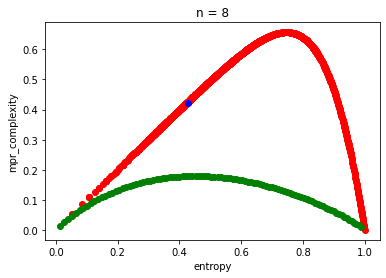

In [ ]:
borders(362880, 0.42946580932168615, 0.420418518597019)

### Функция, вычисляющая старший показатель Ляпунова

In [ ]:
import nolds
import numpy as np


def rowwise_euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2, axis=1))


def delay_embedding(data, emb_dim, lag=1):
    data = np.asarray(data)
    min_len = (emb_dim - 1) * lag + 1
    m = len(data) - min_len + 1
    indices = np.repeat([np.arange(emb_dim) * lag], m, axis=0)
    indices += np.arange(m).reshape((m, 1))
    return data[indices]


def lyap_r_len(**kwargs):
    min_len = (kwargs['emb_dim'] - 1) * kwargs['lag'] + 1
    min_len += kwargs['trajectory_len'] - 1
    min_len += kwargs['min_tsep'] * 2 + 1
    return min_len


def lyap_r(data,
           emb_dim=10,
           lag=None,
           min_tsep=None,
           tau=1,
           min_neighbors=20,
           trajectory_len=20,
           debug_data=False,
           fit_offset=0):
    data = np.asarray(data, dtype="float32")
    n = len(data)
    max_tsep_factor = 0.25
    if lag is None or min_tsep is None:
        # both the algorithm for lag and min_tsep need the fft
        f = np.fft.rfft(data, n * 2 - 1)
    if min_tsep is None:
        # calculate min_tsep as mean period (= 1 / mean frequency)
        mf = np.fft.rfftfreq(n * 2 - 1) * np.abs(f)
        mf = np.mean(mf[1:]) / np.sum(np.abs(f[1:]))
        min_tsep = int(np.ceil(1.0 / mf))
        if min_tsep > max_tsep_factor * n:
            min_tsep = int(max_tsep_factor * n)
            print("signal has very low mean frequency")
    if lag is None:
        acorr = np.fft.irfft(f * np.conj(f))
        acorr = np.roll(acorr, n - 1)
        eps = acorr[n - 1] * (1 - 1.0 / np.e)
        lag = 1
        def nb_neighbors(lag_value):
            min_len = lyap_r_len(
                emb_dim=emb_dim,
                lag=lag_value,
                trajectory_len=trajectory_len,
                min_tsep=min_tsep
            )
            return max(0, n - min_len)
        for i in range(1, n):
            lag = i
            if acorr[n - 1 + i] < eps or acorr[n - 1 - i] < eps:
                break
            if nb_neighbors(i) < min_neighbors:
                print("autocorrelation declined too slowly to find suitable lag")
                break
    min_len = lyap_r_len(
        emb_dim=emb_dim,
        lag=lag,
        trajectory_len=trajectory_len,
        min_tsep=min_tsep
    )
    orbit = delay_embedding(data, emb_dim, lag)
    m = len(orbit)
    dists = np.array([rowwise_euclidean(orbit, orbit[i]) for i in range(m)])
    for i in range(m):
        dists[i, max(0, i - min_tsep):i + min_tsep + 1] = float("inf")

    ntraj = m - trajectory_len + 1
    nb_idx = np.argmin(dists[:ntraj, :ntraj], axis=1)

    div_traj = np.zeros(trajectory_len, dtype=float)
    for k in range(trajectory_len):
        indices = (np.arange(ntraj) + k, nb_idx + k)
        div_traj_k = dists[indices]
        nonzero = np.where(div_traj_k != 0)
        if len(nonzero[0]) == 0:
            div_traj[k] = -np.inf
        else:
            div_traj[k] = np.mean(np.log(div_traj_k[nonzero]))
    ks = np.arange(trajectory_len)
    finite = np.where(np.isfinite(div_traj))
    ks = ks[finite]
    div_traj = div_traj[finite]
    if len(ks) < 1:
        poly = [-np.inf, 0]
    else:
        poly = np.polyfit(ks[fit_offset:], div_traj[fit_offset:], 1)
    le = poly[0] / tau
    if debug_data:
        return (le, (ks, div_traj, poly))
    else:
        return le

## Вычисление для текстов


### Китайский

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import sys

x_max_file = open('/content/drive/My Drive/ProjectSygma/tables/x_max.txt', 'r')
x_max = []
y_max = []
for line in x_max_file:
    x_max.append(list(map(float, line.split())))
y_max_file = open('/content/drive/My Drive/ProjectSygma/tables/y_max.txt', 'r')
for line in y_max_file:
    y_max.append(list(map(float, line.split())))

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_chi/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/eng_acc_val.txt', 'r')
    text_file = open(file_path, 'r')
    text = text_file.read()
    text_file.close()


    table = []
    for line_1 in acc_val:
        values = line_1[:-1].split()
        if len(values) == 2:
            values.append('2')
        i = int(values[0])

        text_serie = get_mas(text, n=i, m=j)
        for k in range(len(text_serie)):
            text_serie[k] = text_serie[k].tolist()
        
        for j in range (int(values[1]), int(values[2]) + 1):
            if i == 1:
                x_val = entropy_measure(text_serie, d=j)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                print(i, j, x_val, mpr_complexity(text_serie, d=j), x_val_1, mpr_complexity(text_serie, d=j) / y_max[j][i])
            else:
                x_val = entropy_measure_m(text_serie, d=j, v=i)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                print(i, j, x_val, mpr_complexity_m(text_serie, d=j, v=i), x_val_1, mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i])


### Русский

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import nolds


dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/russian_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

x_max_file = open('/content/drive/My Drive/ProjectSygma/tables/x_max.txt', 'r')
x_max = []
y_max = []
for line in x_max_file:
    x_max.append(list(map(float, line.split())))
y_max_file = open('/content/drive/My Drive/ProjectSygma/tables/y_max.txt', 'r')
for line in y_max_file:
    y_max.append(list(map(float, line.split())))

words_file = open('/content/drive/My Drive/ProjectSygma/texts/test_rus_1/war_and_piece_ru_pre.txt', 'r')
words = []
for line in words_file:
    if (line[-2] != '?'):
        words.append(line[:-1])
words_file.close()

table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr3.txt', 'r')
table = []
for line in table_file:
    table.append(list(map(float, line[:-2].split())))
text_serie = text_to_series(words, dictionary, table)
print(text_serie[:30])
#print(entropy_measure(text_serie, 3), mpr_complexity(text_serie, 3))
#print(entropy_measure(text_serie, 4), mpr_complexity(text_serie, 4))
#print(nolds.lyap_r(text_serie[:20000], fit='poly'))
#print(lyap_r(text_serie))

[[-0.0005793785487481275, -8.579090686964842e-05, -0.00025024961301224553], [0.0006557575335527239, -0.011427925627118078, -0.013555195303117308], [-0.0017153637724261713, -0.013959728072195076, -0.004815808606990628], [0.0006557575335527239, -0.011427925627118078, -0.013555195303117308], [0.0032703311956997273, -0.004096066579218379, -0.0007060353040301465], [0.006441690500570914, 0.06523343967286886, -0.03502441605541916], [0.0015649344043531627, -0.0040244140291808336, -0.001987330984843237], [0.001103858461305613, -0.005071807225905355, -0.0012112478358038304], [0.00982837424895283, 0.018357039820807143, -0.02040030153555238], [0.07714175957367177, -0.04070357319306647, -0.020305032075613644], [0.003217585915312397, -0.004519160610853781, -0.0006421999791817322], [-0.2554418978553659, -0.2033194585043267, -0.5662313646298162], [0.0032647350930227934, -0.004492101657720026, -0.0006333697127320518], [0.0032703311956997273, -0.004096066579218379, -0.0007060353040301465], [0.0025130747

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob


dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/russian_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

x_max_file = open('/content/drive/My Drive/ProjectSygma/tables/x_max.txt', 'r')
x_max = []
y_max = []
for line in x_max_file:
    x_max.append(list(map(float, line.split())))
y_max_file = open('/content/drive/My Drive/ProjectSygma/tables/y_max.txt', 'r')
for line in y_max_file:
    y_max.append(list(map(float, line.split())))

l = 0
a = [[0] * 4 for i in range(8)]
file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_rus/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/acc_val_1.txt', 'r')
    words_file = open(file_path, 'r')
    words = []
    for line in words_file:
        if (line[-2] != '?'):
            words.append(line[:-1])
    words_file.close()
    table = []
    for line_1 in acc_val:
        values = line_1[:-1].split()
        if len(values) == 2:
            values.append('2')
        i = int(values[0])
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = text_to_series(words, dictionary, table)
        for j in range (int(values[1]), int(values[2]) + 1):
            if i == 1:
                x_val = entropy_measure(text_serie, d=j)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                print(i, j, x_val, mpr_complexity(text_serie, d=j), x_val_1, mpr_complexity(text_serie, d=j) / y_max[j][i], y_max[j][i])
            else:
                x_val = entropy_measure_m(text_serie, d=j, v=i)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                print(i, j, x_val, mpr_complexity_m(text_serie, d=j, v=i), x_val_1, mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i], y_max[j][i])
                #a[i][0] += x_val
                #a[i][1] += mpr_complexity_m(text_serie, d=j, v=i)
                #a[i][2] += x_val_1
                #a[i][3] += mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i]
    acc_val.close()
dictionary_file.close()

/content/drive/My Drive/ProjectSygma/texts/test_rus/rt.txt
9 2 0.8629059852398318 0.22404959991676207 0.613534826853755 0.46297076631778206 0.4839389789094695
10 2 0.8401713726946131 0.2602126048684341 0.5299278521783608 0.5108380833350834 0.5093837232525753


In [ ]:
for i in a:
    print(i)

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.8266282054194761, 0.5997974986439755, 0.31001193331198573, 0.9044773267724747]
[0.0, 0.0, 0.0, 0.0]
[0.8002267984600776, 0.5937941732995279, 0.2160668074907212, 0.9058838992605116]
[0.0, 0.0, 0.0, 0.0]
[0.797760275867537, 0.49141857111318926, 0.2776520400217314, 0.7966642313080222]
[0.7447564918118974, 0.5939898562273549, 0.015199927605083086, 0.9103900093138606]


In [ ]:
import math

def get_split_index_m(A):
    i = len(A) - 1
    while i > 0:
        if A[i] < A[i - 1]:
            i -= 1
        else:
            break
    return i - 1


def get_change_index_m(A, i):
    j = len(A) - 1
    while j >= i:
        if A[j] > A[i]:
            break
        else:
            j -= 1
    return j


def swap_m(A, i, j):
    A[i], A[j] = (A[j], A[i])


# reverse A[start:]
def reverse_m(A, start):
    left = start
    right = len(A) - 1
    while left < right:
        swap_m(A, left, right)
        left += 1
        right -= 1


def next_permutation_m(A, v):
    i = v - 1
    while i >= 0:
        split_index = get_split_index_m(A[i])
        # the Array is sorted in descreased order
        if split_index == -1:
            reverse_m(A[i], 0)
            i -= 1
        else:
            change_index = get_change_index_m(A[i], split_index)
            swap_m(A[i], split_index, change_index)
            reverse_m(A[i], split_index + 1)
            break


def factorial_m(n):
    ans = 1
    for i in range(2, n + 1):
        ans *= i
    return ans


def permutations_m(d, v):
    a = []
    for i in range(v):
        a.append([])
        for j in range(d):
            a[-1].append(j + 1)
    perm = dict()
    perm[str(a)] = 0
    for j in range(factorial_m(d) ** v - 1):
        next_permutation_m(a, v)
        perm[str(a)] = j + 1
    return perm


def s_max_alt(n):
    return math.log(n)


def s_max_list_alt(n):
    return [1 / n] * n


def p_m(arr, d, v):
    pr = [0] * (factorial_m(d) ** v)
    permutation_dict = permutations_m(d, v)
    for i in range(d - 1, len(arr)):
        full_curr_perm = []
        for l in range(v):
            curr = []
            for j in range(i - d + 1, i + 1):
                curr.append([arr[j][l], len(curr) + 1])
            curr.sort()
            curr_perm = []
            for k in curr:
                curr_perm.append(k[1])
            full_curr_perm.append(curr_perm)
        pr[permutation_dict[str(full_curr_perm)]] += 1
    for i in range(len(pr)):
        pr[i] /= len(arr) - d + 1
    return pr


def s_alt(pr):
    entropy = 0
    for i in range(len(pr)):
        if pr[i] != 0:
            entropy -= pr[i] * math.log(pr[i])
    return entropy

def q_0_calculation_alt(n):
    pr = [0] * n
    pr[0] = 1
    b = s_max_list_alt(n)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (s_alt(b) - s_alt(pr) / 2 - s_max_alt(n) / 2)

def q_j_alt(pr):
    b = s_max_list_alt(len(pr))
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation_alt(n) * (s_alt(b) - s_alt(pr) / 2 - s_max_alt(len(pr)) / 2)

def entropy_measure_alt(prob):
    return s_alt(prob)/s_max_alt(len(prob))

def mpr_complexity_alt(prob):
    return q_j_alt(prob) * entropy_measure_alt(prob)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob


dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/russian_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_rus/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/acc_val_2.txt', 'r')
    words_file = open(file_path, 'r')
    words = []
    for line in words_file:
        if (line[-2] != '?'):
            words.append(line[:-1])
    words_file.close()
    table = []
    for line_1 in acc_val:
        print(line_1)
        values = line_1[:-1].split()
        if len(values) == 2:
            values.append('3')
        i = int(values[0])
        j = int(values[1])
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = text_to_series(words, dictionary, table)
        if j == 3:
            p3 = p_m(text_serie, j, i)
        else:
            p4 = p_m(text_serie, j, i)


/content/drive/My Drive/ProjectSygma/texts/test_rus/rt.txt
4 4 4

7 3 3



In [ ]:
counter = 0
counter1 = 0
p3.sort()
p3.reverse()
p4.sort()
p4.reverse()
for i in p3:
    if i > 0:
        counter += 1
    counter1 += 1
print(counter, counter1, counter/ counter1)
counter = 0
counter1 = 0
for i in p4:
    if i > 0:
        counter += 1
    counter1 += 1
print(counter/counter1)

#p32 = p3[:10000]
#a = [i for i, _ in enumerate(p32)]
#plt.bar(a, p32)
#plt.show()

152705 279936 0.5454996856424326
0.5834418402777778


In [ ]:
sum1 = 0
for i in range (2000):
    sum1 += p3[i]
print(sum1)

sum2 = 0
for i in range (10000, len(p3)):
    sum2 += p3[i]
print(sum2)

sum3 = 0
for i in range (2000, 10000):
    sum3 += p3[i]
print(sum3)

0.4635901487070328
0.24238641864129273
0.2940234326513129


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob


dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/russian_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_rus_1/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/acc_val_2.txt', 'r')
    words_file = open(file_path, 'r')
    words = []
    for line in words_file:
        if (line[-2] != '?'):
            words.append(line[:-1])
    words_file.close()
    table = []
    for line_1 in acc_val:
        print(line_1)
        values = line_1[:-1].split()
        if len(values) == 2:
            values.append('3')
        i = int(values[0])
        j = int(values[1])
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = text_to_series(words, dictionary, table)
        if j == 3:
            p3_1 = p_m(text_serie, j, i)
        else:
            p4_1 = p_m(text_serie, j, i)

/content/drive/My Drive/ProjectSygma/texts/test_rus_1/war_and_piece_ru_pre.txt
4 4 4

7 3 3



In [ ]:
counter = 0
counter1 = 0
p3_1.sort()
p3_1.reverse()
p4_1.sort()
p4_1.reverse()
for i in p3_1:
    if i > 0:
        counter += 1
    counter1 += 1
print(counter/counter1)
counter = 0
counter1 = 0
for i in p4:
    if i > 0:
        counter += 1
    counter1 += 1
print(counter/counter1)

0.13942829789666208
0.5834418402777778


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob


dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/english_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_eng/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/acc_val_3.txt', 'r')
    words_file = open(file_path, 'r')
    words = []
    for line in words_file:
        if (line[-2] != '?'):
            words.append(line[:-1])
    words_file.close()
    table = []
    acc_val = [[1, 4], [1, 3]]
    for line_1 in acc_val:
        print(line_1)
        #values = line_1[:-1].split()
        values = line_1
        if len(values) == 2:
            values.append('3')
        i = int(values[0])
        j = int(values[1])
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/eng_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = text_to_series(words, dictionary, table)
        if j == 3:
            print(pi(text_serie, j), j)
            #p3_1_eng = p_m(text_serie, j, i)
        else:
            print(pi(text_serie, j), j)
            #p4_1_eng = p_m(text_serie, j, i)

/content/drive/My Drive/ProjectSygma/texts/test_eng/war_and_piece_en_maude_pre.txt
[1, 4]
[0.03768696359665233, 0.0369266680095264, 0.04388584112389461, 0.04243041814282498, 0.044719204079133934, 0.04612723201061649, 0.04307617569344882, 0.04308012528091441, 0.039851337527795225, 0.040777515788475896, 0.04618055144140194, 0.046771014767507536, 0.04404382462251818, 0.04549332322238942, 0.04239092226816909, 0.04233957763111643, 0.03931419363247509, 0.03908511755947092, 0.0420591569210596, 0.04051486822201421, 0.04032133843620034, 0.03892318447338176, 0.03717351722612573, 0.03682792832288667] 4
[1, 3]
[0.16139167389110615, 0.1729580179429404, 0.17265982467815863, 0.16632272410408722, 0.16602453083930543, 0.16064322854440216] 3


In [ ]:
import random

table_file = open('/content/drive/My Drive/ProjectSygma/tables/rus_vt_tr4.txt', 'r')
table = []
for line in table_file:
    table.append(list(map(float, line[:-2].split())))
rand_list = []
for i in range(300000):
    rand_list.append(table[random.randint(0, len(table) - 1)])
pro_dis = p_m(rand_list, 3, 7)

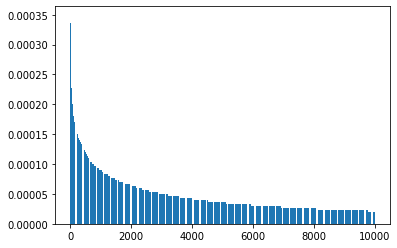

In [ ]:
pro_dis.sort()
pro_dis.reverse()

a = [i for i, _ in enumerate(pro_dis[:10000])]
plt.bar(a, pro_dis[:10000])
plt.show()

In [ ]:
print(entropy_measure_m(rand_list, 4, 4), mpr_complexity_m(rand_list, 4, 4))

0.8554348677141174 0.49851167964935833


0.051390317786922726
0.19222965249199817
0.13942829789666208 279936 279936
0.0


KeyboardInterrupt: ignored

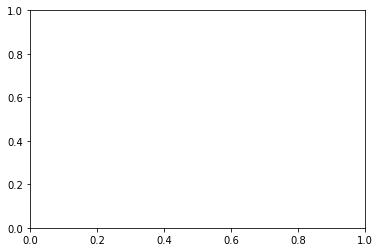

In [ ]:
counter = 0
counter1 = 0
#p3_1.sort()
#p3_1.reverse()
#p3_1_eng.sort()
#p3_1_eng.reverse()
#p4_1.sort()
#p4_1.reverse()
#p4_1_eng.sort()
#p4_1_eng.reverse()
counter = 0
counter1 = 0
for i in range(len(p3_1)):
    if p3_1[i] != 0 and p3_1_eng[i] != 0:
        counter += 1
        #print(p3_1[i], p3_1_eng[i])
    counter1 += 1
print(counter/counter1)
counter = 0
counter1 = 0
for i in range(len(p3_1)):
    if p3_1_eng[i] != 0:
        counter += 1
    counter1 += 1
print(counter/counter1)
counter = 0
counter1 = 0
for i in range(len(p3_1)):
    if p3_1[i] != 0:
        counter += 1
    counter1 += 1
print(counter/counter1, len(p3_1), len(p3_1_eng))
counter = 0
counter1 = 0
for i in p4_1:
    if i > 1:
        counter += 1
    counter1 += 1
print(counter/counter1)


p3_2 = p3_1_eng[:10000]
a = [i for i, _ in enumerate(p3_2)]
plt.bar(a, p3_2)
plt.show()
p3_2 = p3_1[:10000]
a = [i for i, _ in enumerate(p3_2)]
plt.bar(a, p3_2)
plt.show()

In [ ]:
sum_1 = 0
for i in range (1000):
    sum_1 += p3_1[i]
print(sum_1)

sum_2 = 0
for i in range (10000, len(p3_1)):
    sum_2 += p3_1[i]
print(sum_2)

sum_3 = 0
for i in range (1000, 10000):
    sum_3 += p3_1[i]
print(sum_3)

0.3652754666067035
0.1950438497862143
0.4396806836069523


### Английский

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

nlp.max_length = 86467196


dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/english_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

x_max_file = open('/content/drive/My Drive/ProjectSygma/tables/x_max.txt', 'r')
x_max = []
y_max = []
for line in x_max_file:
    x_max.append(list(map(float, line.split())))
y_max_file = open('/content/drive/My Drive/ProjectSygma/tables/y_max.txt', 'r')
for line in y_max_file:
    y_max.append(list(map(float, line.split())))

a = [[0] * 4 for i in range(20)]
file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_eng/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/acc_val.txt', 'r')
    text_file = open(file_path, 'r')
    text = text_file.read()
    text_file.close()
    text = english_text_to_series_pre(text)
    #save_text = open('/content/drive/My Drive/ProjectSygma/texts/test_examples/war_and_piece_eng_pre.txt', 'w')
    #save_text.write(pre_text)
    #save_text.close()
    inc = 0
    table = []
    for line_1 in acc_val:
        values = line_1[:-1].split()
        if len(values) == 2:
            values.append('2')
        #print('val =', values)
        i = int(values[0])
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/eng_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = text_to_series(text, dictionary, table)
        for j in range (int(values[1]), int(values[2]) + 1):
            if i == 1:
                x_val = entropy_measure(text_serie, d=j)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                #plt.scatter(
                #entropy_measure(text_serie, d=j),
                #x_val,
                #mpr_complexity(text_serie, d=j), c="red")
                #mpr_complexity(text_serie, d=j) / y_max[j][i], c="red")
                print(i, j, x_val, mpr_complexity(text_serie, d=j), x_val_1, mpr_complexity(text_serie, d=j) / y_max[j][i])
            else:
                x_val = entropy_measure_m(text_serie, d=j, v=i)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                #plt.scatter(
                #entropy_measure_m(text_serie, d=j, v=i),
                #x_val,
                #mpr_complexity_m(text_serie, d=j, v=i), c =[i/19, j/9, 0])
                #mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i], c =[i/19, j/9, 0])
                print(i, j, x_val, mpr_complexity_m(text_serie, d=j, v=i), x_val_1, mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i])
                #a[inc][0] += x_val
                #a[inc][1] += mpr_complexity_m(text_serie, d=j, v=i)
                #a[inc][2] += x_val_1
                #a[inc][3] += mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i]
                inc += 1

    #plt.xlabel('entropy')
    #plt.ylabel('mpr_complexity')
    #plt.show()
    #acc_val.close()
dictionary_file.close()

/content/drive/My Drive/ProjectSygma/texts/test_eng/et.txt


### Немецкий

In [ ]:
# 1. str.lower()
# 2. remove non-letters
# 3. remove punctuation
# 4. remove whitespaces (str.strip())
# 5. Лемматизация
# 6. Удаление стоп слов

GERMAN_ALB = "abcdefghijklmnopqrstuvwxyzäüöÄÜÖß"
NLP = spacy.load('de')
NLP.max_length = 5300000

def replaceSpaceToStandart(text):
  return text.replace('\t', ' ').replace('\n', ' ')

def replacePunctuationToSpace(text):
  translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  return text.translate(translator)

def removeMultipleSpaces(s):
  return sub(' +', ' ', s)

def saveOnlyAlbavetSymbols(words, chAlb):
  return ' '.join(s for s in words.split() if all(c in chAlb for c in s))

def getLemma(s, nlp):
  lemmatizedSent = []
  doc = nlp(s)
  for token in doc:
    lemmatizedSent.append(token.lemma_)
  return ' '.join(lemmatizedSent)

def removeStopWords(s):
  ge_stops = set(stopwords.words('german'))
  all_words = s.split(' ')
  dropStopWords = []
  for word in all_words: 
      if word not in ge_stops:
          dropStopWords.append(word)
  return ' '.join(dropStopWords)

def prepareText(text):
  text = text.lower()
  text = replacePunctuationToSpace(text)
  text = replaceSpaceToStandart(text)
  text = saveOnlyAlbavetSymbols(text, GERMAN_ALB)
  text = removeMultipleSpaces(text)
  text = getLemma(text, NLP)
  # text = removeStopWords(text)
  return text

In [ ]:
def convertTextToEmbeddingSeries(text, dict_words, emb):
    wtext = prepareText(text)
    wdata = wtext.split(' ')
    word2ind = dict(zip(dict_words, np.arange(len(dict_words))))
    embText = []
    for word in wdata:
        ind = word2ind.get(word)
        if ind: embText.append(emb[ind])
    return embText

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer

import string
import numpy as np
import pandas as pd
from re import sub
import nltk
from nltk.corpus import stopwords
import spacy

from tqdm import tqdm
import pickle
from google.colab import files
from os import listdir
import os

dictionary_file = open('/content/drive/My Drive/ProjectSygma/dictionaries/german_dictionary.txt', 'r')
dictionary = []
for line in dictionary_file:
    dictionary.append(line[:-1])

x_max_file = open('/content/drive/My Drive/ProjectSygma/tables/x_max.txt', 'r')
x_max = []
y_max = []
for line in x_max_file:
    x_max.append(list(map(float, line.split())))
y_max_file = open('/content/drive/My Drive/ProjectSygma/tables/y_max.txt', 'r')
for line in y_max_file:
    y_max.append(list(map(float, line.split())))

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/test_ger/*')
for file_path in file_list:
    print(file_path)
    acc_val = open('/content/drive/My Drive/ProjectSygma/tables/acc_val_eng.txt', 'r')
    text_file = open(file_path, 'r')
    text = text_file.read()
    text_file.close()

    table = []
    for line_1 in acc_val:
        values = line_1[:-1].split()
        if len(values) == 2:
            values.append('2')
        #print('val =', values)
        i = int(values[0])
        table_file = open('/content/drive/My Drive/ProjectSygma/tables/ger_vt_tr' + str(i) + '.txt', 'r')
        table = []
        for line in table_file:
            table.append(list(map(float, line[:-2].split())))
        text_serie = convertTextToEmbeddingSeries(text, dictionary, table)
        for j in range (int(values[1]), int(values[2]) + 1):
            if i == 1:
                x_val = entropy_measure(text_serie, d=j)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                #plt.scatter(
                #entropy_measure(text_serie, d=j),
                #x_val,
                #mpr_complexity(text_serie, d=j), c="red")
                #mpr_complexity(text_serie, d=j) / y_max[j][i], c="red")
                print(i, j, x_val, mpr_complexity(text_serie, d=j), x_val_1, mpr_complexity(text_serie, d=j) / y_max[j][i])
            else:
                x_val = entropy_measure_m(text_serie, d=j, v=i)
                if x_val > x_max[j][i]:
                    x_val_1 = (x_val - x_max[j][i]) / (1 - x_max[j][i])
                else:
                    x_val_1 = (x_val - x_max[j][i]) / (x_max[j][i])
                #plt.scatter(
                #entropy_measure_m(text_serie, d=j, v=i),
                #x_val,
                #mpr_complexity_m(text_serie, d=j, v=i), c =[i/19, j/9, 0])
                #mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i], c =[i/19, j/9, 0])
                print(i, j, x_val, mpr_complexity_m(text_serie, d=j, v=i), x_val_1, mpr_complexity_m(text_serie, d=j, v=i) / y_max[j][i])

    #plt.xlabel('entropy')
    #plt.ylabel('mpr_complexity')
    #plt.show()
    #acc_val.close()
dictionary_file.close()

/content/drive/My Drive/ProjectSygma/texts/test_ger/amazonReview.txt
2 5 0.7679557979084614 0.54607030315302 0.21157589872961888 0.9270605234127941
2 6 0.6175277222790856 0.599238530244082 -0.1752355041326591 0.9036344185489014
3 3 0.8771112932096048 0.2135389015759602 0.6710324982420781 0.4749283071770956
3 4 0.7728082678574788 0.5409917008830718 0.22990183749829288 0.9200632766042854
4 3 0.8294717996616677 0.3432306281608951 0.4863801741951675 0.6631779042391303
4 4 0.6294645685491067 0.6043986358886831 -0.15526880234414625 0.9220619157379153
5 2 0.9142455077504387 0.10675643087086818 0.7856137693760967 0.29146391563453006
5 3 0.7852483256741583 0.49358763772063485 0.29381655466668294 0.8617837148215993
6 2 0.9131669425010358 0.12340085449360799 0.7842690454498694 0.31051873949447784
6 3 0.7150867894808408 0.6042161531079799 -0.006857711551347025 0.9795262642786595
7 2 0.905602826870434 0.15025301453853093 0.7532627071567857 0.35139759301031825
7 3 0.6354789676087961 0.60684398268044

In [ ]:
list_3 = ["red", "red", "red", "red", "orange", "orange", "yellow", "yellow", "green", "green", "green", "blue", "blue", "purple", "purple", "black", "black", "black"]
list_4 = ["orange", "yellow", "green", "blue", "orange", "yellow", "red", "orange", "yellow", "red", "orange", "red", "orange", "red", "orange", "red", "red", "red"]
list_1 =   [0.9481253784,
            0.9250944326,
            0.9058834899,
            0.8539797642,
            0.9194257816,
            0.874470151,
            0.9717829554,
            0.8886668092,
            0.8075824084,
            0.956013625,
            0.8454699661,
            0.9235146161,
            0.7968597349,
            0.8977852156,
            0.7492373915,
            0.882232874,
            0.8525419005,
            0.8270080125]

list_2 =   [0.07321163089,
            0.1630324148,
            0.2853840248,
            0.5509322575,
            0.1494210438,
            0.3433879415,
            0.03205841461,
            0.2405533578,
            0.5683303874,
            0.05990595023,
            0.3648466696,
            0.1138280093,
            0.481381496,
            0.1604042392,
            0.57828561,
            0.1947951123,
            0.2414414229,
            0.2805087139]

list_5 =   [0.8764068329,
            0.7864003772,
            0.6802172852,
            0.4188661402,
            0.784306467,
            0.5744990138,
            0.9327393672,
            0.6646716852,
            0.2449310732,
            0.8900340624,
            0.4918477255,
            0.809977152,
            0.2744355406,
            0.7328288724,
            0.02827656353,
            0.681237267,
            0.5843186877,
            0.4912130792]

list_6 =   [0.1968190637,
            0.3338065554,
            0.4844948752,
            0.8307899527,
            0.3323248498,
            0.5839990412,
            0.09526050741,
            0.4647885667,
            0.8670367116,
            0.163553827,
            0.6370072795,
            0.2864301881,
            0.7803926063,
            0.3751383209,
            0.8863205934,
            0.426625126,
            0.4989088157,
            0.5506825231]

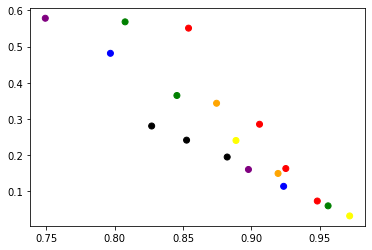

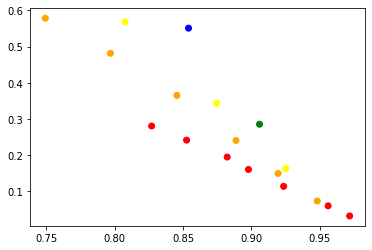

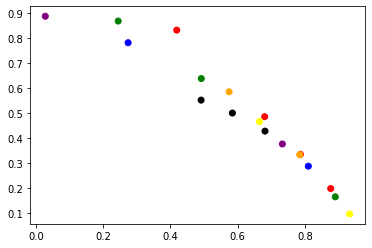

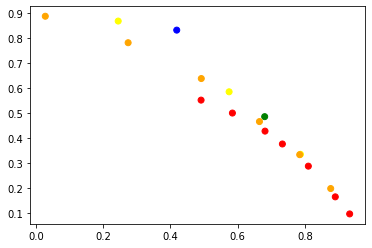

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(list_1, list_2, c=list_3)
plt.show()
plt.scatter(list_1, list_2, c=list_4)
plt.show()
plt.scatter(list_5, list_6, c=list_3)
plt.show()
plt.scatter(list_5, list_6, c=list_4)
plt.show()
list_1 = []
list_2 = []
list_5 = []
list_6 = []

### Испанский

## Построение графиков энтропия-сложность

In [ ]:
import matplotlib.pyplot as plt
import csv

list_3 = ["red", "red", "red", "red", "red", "red", "orange", "orange", "orange", "orange", "yellow", "yellow", "green", "green", "green", "blue", "blue", "pink", "pink", "purple", "purple",
          "black", "black", "black", "black", "black", "black", "black", "black", "black", "black", "black", "black"]

list_4 = ["yellow", "green", "blue", "purple", "purple", "purple", "orange", "yellow", "green", "blue", "orange", "yellow", "red", "orange", "yellow", "red", "orange", "red",
"orange", "red", "orange", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red"]

#list_3 = list_3[:-7]
#list_4 = list_4[:-7]
list_1 = []
list_2 = []
list_5 = []
list_6 = []

with open('/content/drive/My Drive/ProjectSygma/data_3.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in spamreader:
        i += 1
        list_1.append(float(row[0]))
        list_2.append(float(row[1]))
        list_5.append(float(row[2]))
        list_6.append(float(row[3]))
        if not(i % 33):
            print(list_1, list_2, list_5, list_6)
            plt.scatter(list_1, list_2, c=list_3)
            plt.show()
            plt.scatter(list_1, list_2, c=list_4)
            plt.show()
            plt.scatter(list_5, list_6, c=list_3)
            plt.show()
            plt.scatter(list_5, list_6, c=list_4)
            plt.show()
            list_1 = []
            list_2 = []
            list_5 = []
            list_6 = []

In [ ]:
borders(46656, 0.6397795377563126,	0.5825999478008991)